In [3]:
import numpy as np
import pandas as pd
from sklearn import tree

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

col_names = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector']
df=pd.read_csv("bupa.csv", header=None,names=col_names)
print(df.shape)
feature = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks']
x=df[feature]   #feature Values
# y is target values
y=df.selector
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test


from sklearn.ensemble import RandomForestClassifier
# Create RandomForest classifer object
rfc = RandomForestClassifier(n_estimators=3,criterion='entropy')
# Train Decision Tree Classifer
rfc.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

#find out best accuracy in deffirent deffirent c values
ma_accuracy=[]
for i in range(1,101):
    rfc=RandomForestClassifier(n_estimators=i,criterion='entropy')
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    a=accuracy_score(y_test,y_pred)
    ma_accuracy.append(a)
    
print(ma_accuracy,end=" , ") 
print("\nMaximum Accuracy")
print(max(ma_accuracy))

(345, 7)
Accuracy: 0.6057692307692307
[0.5865384615384616, 0.6923076923076923, 0.6346153846153846, 0.6538461538461539, 0.6346153846153846, 0.6538461538461539, 0.6634615384615384, 0.6730769230769231, 0.6826923076923077, 0.6730769230769231, 0.7019230769230769, 0.6730769230769231, 0.7115384615384616, 0.6538461538461539, 0.6923076923076923, 0.7211538461538461, 0.7307692307692307, 0.6538461538461539, 0.6923076923076923, 0.6826923076923077, 0.6634615384615384, 0.6730769230769231, 0.6442307692307693, 0.7307692307692307, 0.7211538461538461, 0.7019230769230769, 0.7115384615384616, 0.6538461538461539, 0.6634615384615384, 0.6730769230769231, 0.6923076923076923, 0.6730769230769231, 0.6923076923076923, 0.7211538461538461, 0.6730769230769231, 0.7019230769230769, 0.7019230769230769, 0.7211538461538461, 0.7403846153846154, 0.7019230769230769, 0.6826923076923077, 0.7307692307692307, 0.6923076923076923, 0.7115384615384616, 0.6634615384615384, 0.6826923076923077, 0.75, 0.75, 0.7211538461538461, 0.75, 0.7

[[29 20]
 [ 6 49]]


c:\users\user\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Text(0.5, 257.44, 'Predicted label')

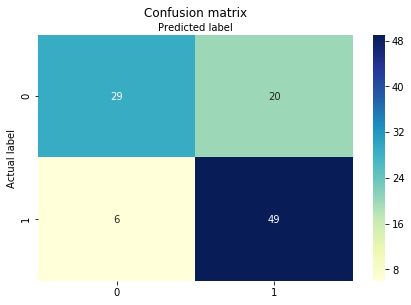

In [5]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)
#this model is binary classification so 2*2 metrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')